In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
INC=pd.read_excel('C:/Users/miavila/Documents/U/PROYECTO P/variables exogenas/INCIDENTES.xlsx',sheet_name='INCIDENTES ONLY FECHA')

<AxesSubplot:>

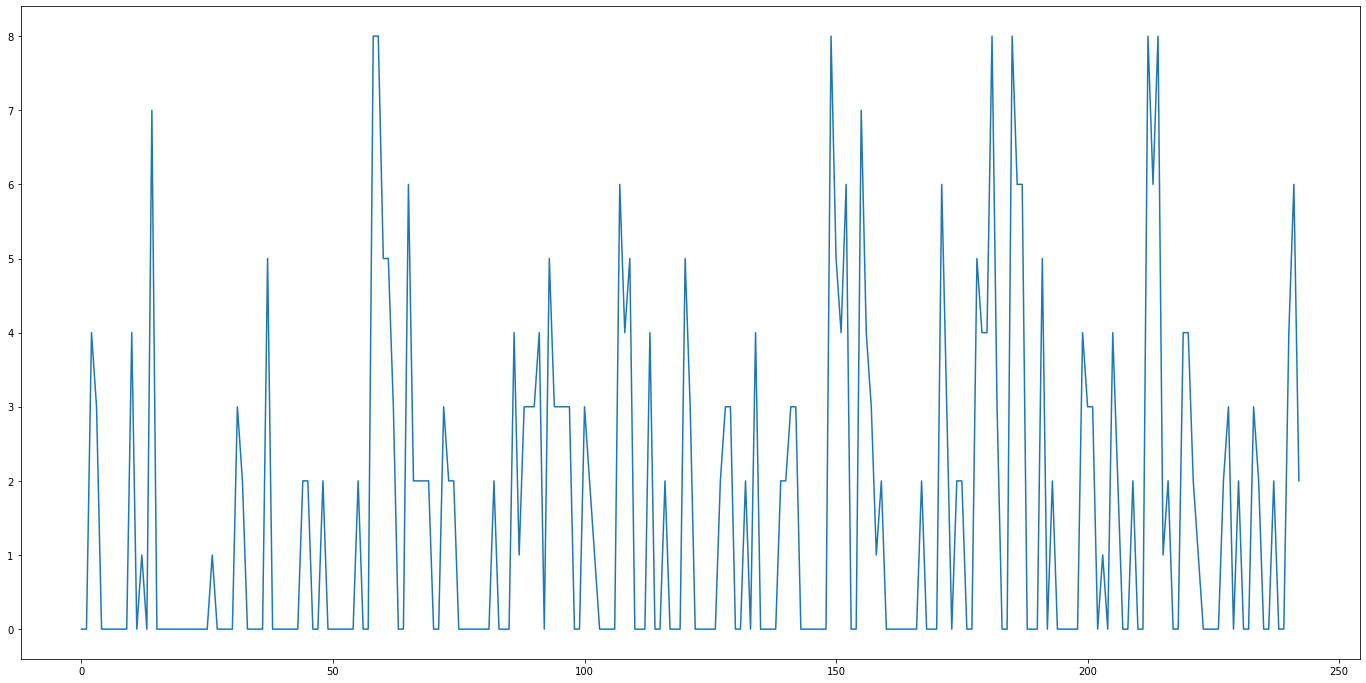

In [35]:
fig, ax = plt.subplots(figsize=(24,12))
INC.INC_CAT.plot()

In [36]:
INC2=pd.get_dummies(INC,columns=['INC_CAT'],drop_first=False)

In [25]:
INC2

Fecha  INC  INC_HIT  festivo  festividades  Dia_MesN  Dia_SemN  MesN  \
0   2022-01-01  NaN        0        1             0         1         6     1   
1   2022-01-02  NaN        0        0             0         2         7     1   
2   2022-01-03  NaN      499        0             0         3         1     1   
3   2022-01-04  2.0      379        0             0         4         2     1   
4   2022-01-05  NaN        0        0             0         5         3     1   
..         ...  ...      ...      ...           ...       ...       ...   ...   
238 2022-08-27  NaN        0        0             0        27         6     8   
239 2022-08-28  NaN        0        0             0        28         7     8   
240 2022-08-29  4.0      423        0             0        29         1     8   
241 2022-08-30  1.0      700        0             0        30         2     8   
242 2022-08-31  2.0      163        0             0        31         3     8   

     INC_CAT_0  INC_CAT_1  INC_CAT_2  INC_CAT_3  INC_CAT_4  INC_CAT_5  \
0            1          0          0          0          0          0   
1            1          0          0          0          0          0   
2            0          0          0          0          1          0   
3            0          0          0          1          0          0   
4            1          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
238          1          0          0          0          0          0   
239          1          0          0          0          0          0   
240          0          0          0          0          1          0   
241          0          0          0          0          0          0   
242          0          0          1          0          0          0   

     INC_CAT_6  INC_CAT_7  INC_CAT_8  
0            0          0          0  
1            0          0          0  
2            0          0          0  
3            0          0          0  
4            0          0          0  
..         ...        ...        ...  
238          0          0          0  
239          0          0          0  
240          0          0          0  
241          1          0          0  
242          0          0          0  

[243 rows x 17 columns]

In [37]:
INC['INC_CAT']=INC['INC_CAT'].astype('category')

In [38]:
resumen=INC.groupby(['MesN','INC_CAT'],as_index=False)['INC_CAT'].count()
resumen=pd.DataFrame(resumen)
resumen

MesN INC_CAT
0      1       0
1      1       1
2      1       2
3      1       3
4      1       4
..   ...     ...
67     8       4
68     8       5
69     8       6
70     8       7
71     8       8

[72 rows x 2 columns]

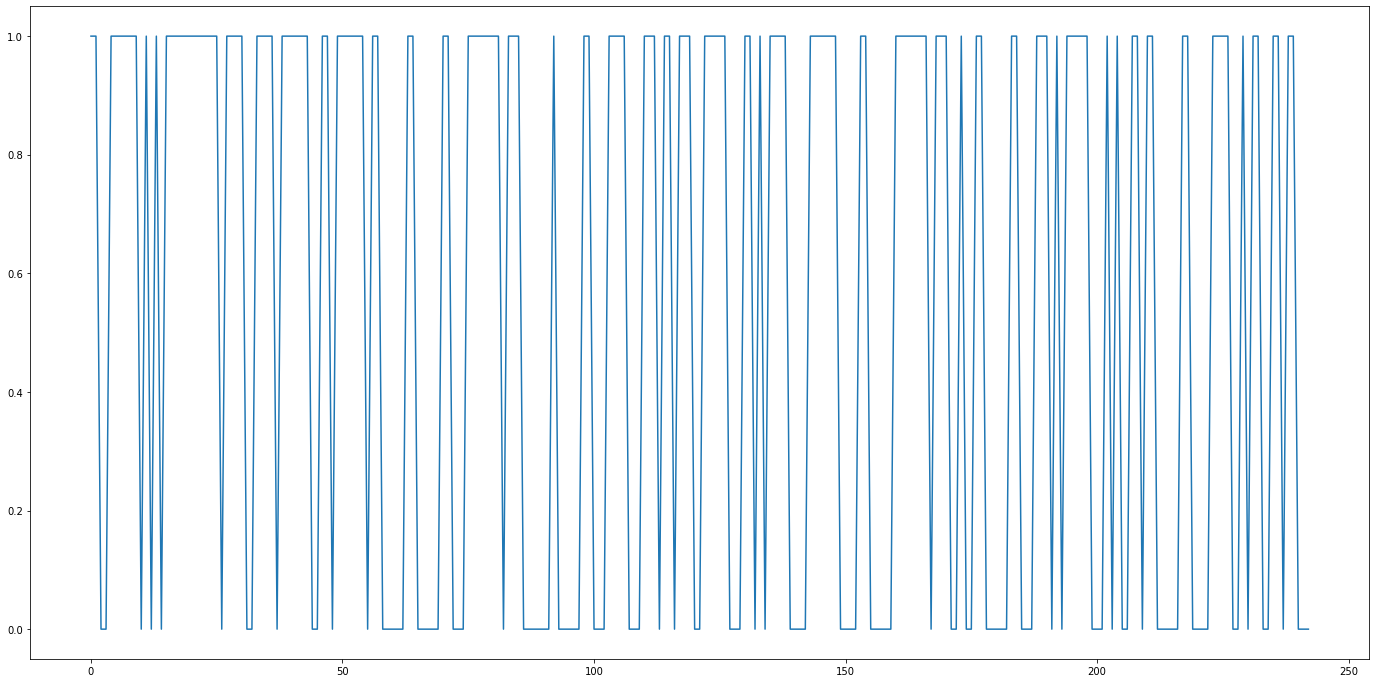

In [39]:
fig, ax = plt.subplots(figsize=(24,12))
#INC.INC_CAT_0.plot()

plt.plot(INC2.INC_CAT_0)

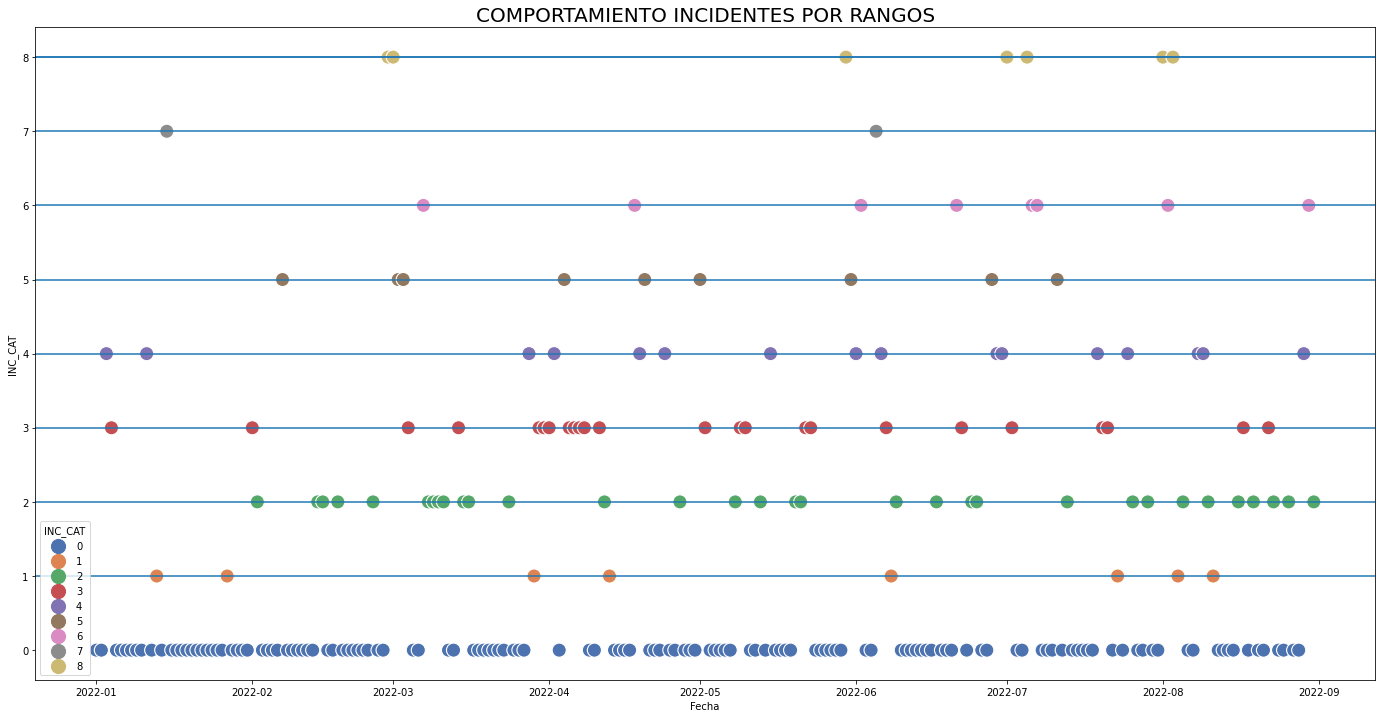

In [40]:

import seaborn as sns
INC['INC_CAT']=INC['INC_CAT'].astype('int')
fig, ax = plt.subplots(figsize=(24,12))
graph=sns.scatterplot(data=INC,x='Fecha' ,y="INC_CAT", hue="INC_CAT",ci=None,palette='deep',size="INC_CAT",sizes=(200, 200),legend="full")
plt.title( "COMPORTAMIENTO INCIDENTES POR RANGOS",fontsize = 20)
graph.axhline(1)
graph.axhline(2)
graph.axhline(3)
graph.axhline(4)
graph.axhline(5)
graph.axhline(6)
graph.axhline(7)
graph.axhline(8)
graph.axhline(8)

In [41]:
from turtle import color
import plotly.graph_objects as go
import plotly.express as px
# Create figure
    # ORDENA POR FECHA
        #P=P.sort_values(by='FechaT') # PENSILVANIA
        #P.index = range(P.shape[0])
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(INC.Fecha), y=list(INC.INC_CAT)))
    #px.line(x=list(UPN.FechaT), y=list(UPN.sumRecibidas)))

# Set title
fig.update_layout(
    title_text="SERIE DE TIEMPO INCIDENTES POR RANGO"
)

In [42]:
INC=INC.set_index('Fecha')
INC

INC  INC_HIT  INC_CAT  festivo  festividades  Dia_MesN  Dia_SemN  \
Fecha                                                                          
2022-01-01  NaN        0        0        1             0         1         6   
2022-01-02  NaN        0        0        0             0         2         7   
2022-01-03  NaN      499        4        0             0         3         1   
2022-01-04  2.0      379        3        0             0         4         2   
2022-01-05  NaN        0        0        0             0         5         3   
...         ...      ...      ...      ...           ...       ...       ...   
2022-08-27  NaN        0        0        0             0        27         6   
2022-08-28  NaN        0        0        0             0        28         7   
2022-08-29  4.0      423        4        0             0        29         1   
2022-08-30  1.0      700        6        0             0        30         2   
2022-08-31  2.0      163        2        0             0        31         3   

            MesN  
Fecha             
2022-01-01     1  
2022-01-02     1  
2022-01-03     1  
2022-01-04     1  
2022-01-05     1  
...          ...  
2022-08-27     8  
2022-08-28     8  
2022-08-29     8  
2022-08-30     8  
2022-08-31     8  

[243 rows x 8 columns]

In [43]:
INC=pd.DataFrame(INC,columns=(  'INC_HIT', 'festivo', 'festividades', 'Dia_MesN',
       'Dia_SemN','MesN'))

### MODELO PARA HIT

In [44]:
# Separación datos train-val-test

fin_train = '2022-07-31'
fin_validacion = '2022-08-31'
datos_train = INC.loc[: fin_train, :]
datos_test   = INC.loc[fin_train:fin_validacion, :]


print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
datos_test=datos_test.drop(['2022-07-31'])
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

Fechas train      : 2022-01-01 00:00:00 --- 2022-07-31 00:00:00  (n=212)
Fechas test  : 2022-08-01 00:00:00 --- 2022-08-31 00:00:00  (n=31)


In [163]:
212*0.01

2.12

In [45]:
X_train, X_test, y_train, y_test = datos_train.drop(columns = ['INC_HIT']),datos_test.drop(columns=['INC_HIT']) ,datos_train.INC_HIT    ,datos_test.INC_HIT

In [46]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 10,max_features=5,max_depth=5,min_samples_split=0.01, random_state = 123456)

# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(max_depth=5, max_features=5, min_samples_split=0.01,
                      n_estimators=10, random_state=123456)

In [53]:
tree_pred =regressor.predict(X_test)


In [54]:
from sklearn.metrics import  mean_absolute_percentage_error, mean_squared_error,mean_absolute_error
from sklearn import metrics

In [55]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tree_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tree_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tree_pred)))

Mean Absolute Error: 156.20546309808702
Mean Squared Error: 57856.04445167232
Root Mean Squared Error: 240.53283445648813


In [56]:
y_predd = pd.DataFrame(tree_pred)
y_predd.index=y_test.index
y_predd

0
Fecha                 
2022-08-01  781.831039
2022-08-02  639.686396
2022-08-03  505.161529
2022-08-04  354.480869
2022-08-05  292.760819
2022-08-06  275.860819
2022-08-07  359.120525
2022-08-08  245.173086
2022-08-09  231.597655
2022-08-10  190.968513
2022-08-11  143.144202
2022-08-12   61.741421
2022-08-13   61.741421
2022-08-14   67.030641
2022-08-15  155.492729
2022-08-16  168.813131
2022-08-17  125.909690
2022-08-18   85.444622
2022-08-19   68.108508
2022-08-20   68.108508
2022-08-21   73.397728
2022-08-22  236.398712
2022-08-23  234.311212
2022-08-24  109.398975
2022-08-25   73.745655
2022-08-26   56.409541
2022-08-27   56.409541
2022-08-28   57.796927
2022-08-29  609.542857
2022-08-30  562.326190
2022-08-31  348.660588

In [57]:
y_predd.values.sum()

7300.574045889742

In [58]:
y_predd.values.sum(),y_test.sum(),y_predd.values.sum()-y_test.sum()

(7300.574045889742, 7175, 125.57404588974168)

In [59]:
y_predd=np.round(y_predd)

In [60]:
y_predd.rename(columns={0:'Predicción'},inplace=True)

In [61]:
y_predd.to_excel('C:/Users/miavila/Documents/U/PROYECTO P/PRONOSTICO INCIDENTES/pronostico agosto HIT2.xlsx')

In [121]:
#y_predd=pd.read_excel('C:/Users/miavila/Documents/U/PROYECTO P/PRONOSTICO INCIDENTES/pronostico agosto HIT.xlsx')

In [64]:
y_predd.index=y_test.index

C:\Users\miavila\AppData\Local\Temp\ipykernel_12524\1699371681.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



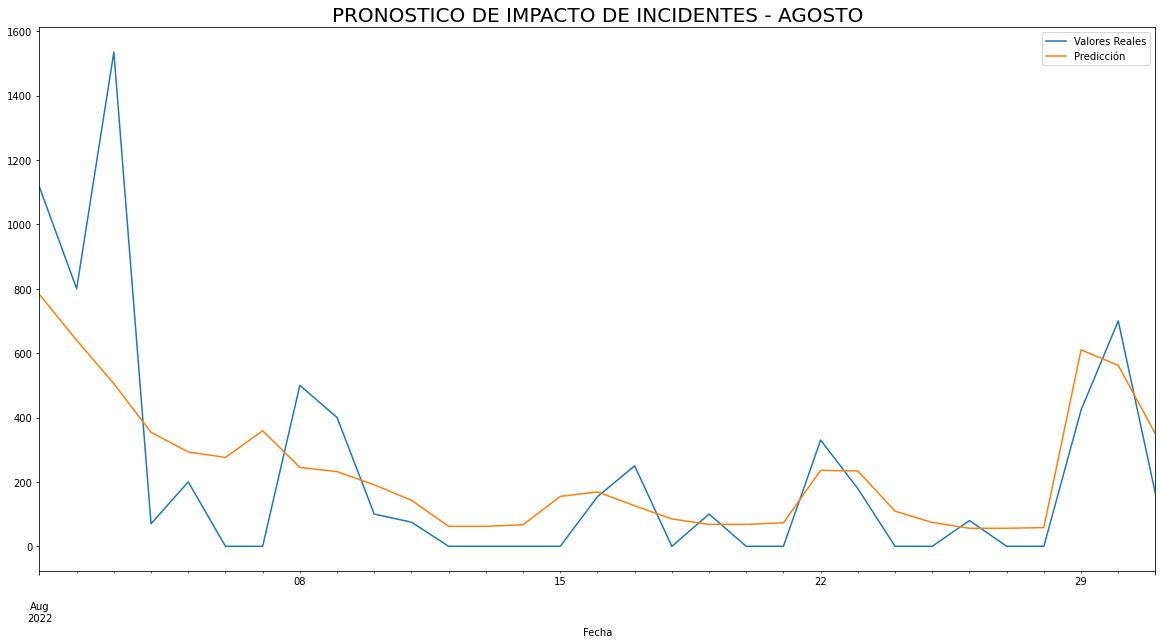

In [66]:
fig, ax = plt.subplots(figsize=(20,10))
y_test.plot(ax=ax, label="Valores Reales")
y_predd.plot(ax=ax, label="RandomForest") #,color = "orange"
plt.title("PRONOSTICO DE IMPACTO DE INCIDENTES - AGOSTO",fontsize = 20)

ax.legend()
fig.show()

In [68]:
from sklearn import tree

## MODELO PARA INCIDENTE EN CATEGORIA [0,8]


In [91]:
INC=pd.read_excel('C:/Users/miavila/Documents/U/PROYECTO P/variables exogenas/INCIDENTES.xlsx',sheet_name='INCIDENTES ONLY FECHA')

In [92]:
INC=pd.DataFrame(INC,columns=(  'INC_CAT', 'festivo', 'festividades', 'Dia_MesN',
       'Dia_SemN','MesN','Fecha'))

In [93]:
INC=INC.set_index('Fecha')


In [94]:
# Separación datos train-val-test

fin_train = '2022-07-31'
fin_validacion = '2022-08-31'
datos_train = INC.loc[: fin_train, :]
datos_test   = INC.loc[fin_train:fin_validacion, :]


print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
datos_test=datos_test.drop(['2022-07-31'])
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

Fechas train      : 2022-01-01 00:00:00 --- 2022-07-31 00:00:00  (n=212)
Fechas test  : 2022-08-01 00:00:00 --- 2022-08-31 00:00:00  (n=31)


In [51]:
31+212

243

In [95]:
X_train, X_test, y_train, y_test = datos_train.drop(columns = ['INC_CAT']),datos_test.drop(columns=['INC_CAT']) ,datos_train.INC_CAT    ,datos_test.INC_CAT

In [96]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 50,max_features=5,max_depth=25,min_samples_split=0.001, random_state = 123456)

# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(max_depth=25, max_features=5, min_samples_split=0.001,
                      n_estimators=50, random_state=123456)

In [97]:
tree_pred =regressor.predict(X_test)

In [98]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tree_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tree_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tree_pred)))

Mean Absolute Error: 0.9703225806451612
Mean Squared Error: 1.6061677419354843
Root Mean Squared Error: 1.2673467331142982


In [101]:
y_predd = pd.DataFrame(tree_pred)
y_predd.index=y_test.index
y_predd

y_preddd=np.round(y_predd)
y_preddd

0
Fecha          
2022-08-01  7.0
2022-08-02  6.0
2022-08-03  4.0
2022-08-04  3.0
2022-08-05  3.0
2022-08-06  2.0
2022-08-07  2.0
2022-08-08  4.0
2022-08-09  3.0
2022-08-10  2.0
2022-08-11  1.0
2022-08-12  0.0
2022-08-13  0.0
2022-08-14  0.0
2022-08-15  1.0
2022-08-16  0.0
2022-08-17  1.0
2022-08-18  1.0
2022-08-19  1.0
2022-08-20  1.0
2022-08-21  1.0
2022-08-22  3.0
2022-08-23  3.0
2022-08-24  1.0
2022-08-25  1.0
2022-08-26  1.0
2022-08-27  1.0
2022-08-28  0.0
2022-08-29  5.0
2022-08-30  4.0
2022-08-31  3.0

In [102]:
y_preddd.to_excel('C:/Users/miavila/Documents/U/PROYECTO P/PRONOSTICO INCIDENTES/pronostico agosto CAT2.xlsx')

C:\Users\miavila\AppData\Local\Temp\ipykernel_12524\4126123943.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



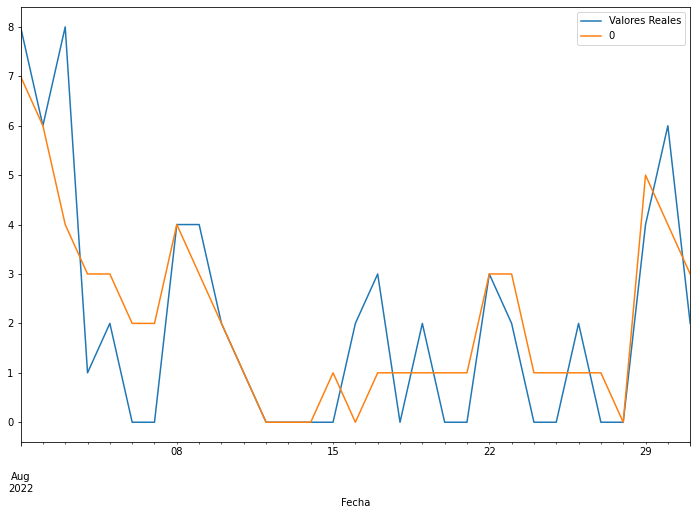

In [103]:
fig, ax = plt.subplots(figsize=(12,8))
y_test.plot(ax=ax, label="Valores Reales")
y_preddd.plot(ax=ax, label="RandomForest") #,color = "orange"


ax.legend()
fig.show()

In [104]:
from sklearn import tree

In [105]:
fn=X_train.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,15), dpi=900)
tree.plot_tree(regressor.estimators_[20],
               feature_names = fn, 
               #lass_names=cn,
               filled = True);